In [7]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp


In [8]:
df = pd.read_csv("data.csv")

df = df.loc[(df['Disease'] == 'Gonorrhea') & (df['County'] == 'California') & (df['Sex'] != 'Total')]
#print(df)

data = df[['Year','Sex','Cases']]

# Use pivot_table to reshape the data with multiple values
reshaped_df = df.pivot_table(index='Year', columns='Sex', values=[ 'Cases'], aggfunc='sum').reset_index()

# Flatten the multi-level column header
reshaped_df.columns = [f'{col[0]}_{col[1]}' if col[1] != '' else f'{col[0]}' for col in reshaped_df.columns]

# If you want to replace NaN values with 0, you can use fillna
reshaped_df = reshaped_df.fillna(0)
print(reshaped_df.head())
#print(reshaped_df)

   Year  Cases_Female  Cases_Male
0  2001       10442.0     12683.0
1  2002       10896.0     13620.0
2  2003       11780.0     13830.0
3  2004       13783.0     16615.0
4  2005       15712.0     18240.0


# Model

x' = -ax+b(f-x)y and 
y' = -cy + d(g-y)x

# Heterosexual male model fitting

In [9]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.integrate import odeint

/Users/nuzhatnishi/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


a_fit: [-6.00125055e-01  7.26781818e-01 -5.46689064e+03  4.64348937e+00
 -4.41372302e+01  6.63806928e-01]


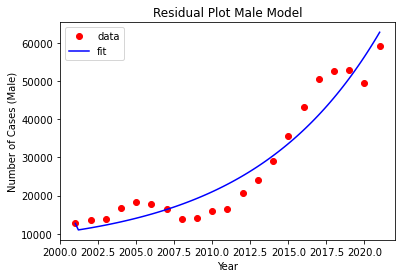

In [10]:
x_data = reshaped_df['Cases_Male'].to_numpy()
y_data = reshaped_df['Cases_Female'].to_numpy()
t_data = reshaped_df['Year'].to_numpy()
#print(t_data)

def fitfunc(t, a, b, c, d, f, g):
    #x, y = variables
    def myode(Y, t):
        x,y = Y
        return (-a * x + b * (f - x) * y, -c * y + d * (g - y) * x)
    
    #Set up the initial conditions and parameter values
   # t = np.linspace(min(x_data), max(x_data), 100)
    initial_x =  reshaped_df['Cases_Male'][0]
    #print(initial_x)
    initial_y =  reshaped_df['Cases_Female'][0]
    initial_conditions = [initial_x, initial_y]
    solution = odeint(myode, initial_conditions, t)
   # print(solution[:,0])
    return solution[:,0]
    #return solution[0:,1]


initial_guess = [1, 1, 1, 1, 1, 1]

#a_fit, b_fit, c_fit, d_fit, f_fit, g_fit, acov, bcov, ccov, dcov, fcov, gcov = curve_fit(fitfunc, t_data, (x_data, y_data), p0=None)
#print (a_fit, b_fit, c_fit, d_fit, f_fit, g_fit)

param, acov = curve_fit(fitfunc, t_data, x_data, p0=initial_guess)
print ("a_fit:", param)


#tfit = np.linspace(0,1);
tfit = np.linspace(min(t_data), max(t_data), 100);
#print(tfit)
#tfit = np.linspace(0,20);
fit = fitfunc(tfit, param[0], param[1], param[2], param[3], param[4], param[5])
#print(fit)

import matplotlib.pyplot as plt
plt.title('Residual Plot Male Model')
plt.xlabel('Year')
plt.ylabel('Number of Cases (Male)')
plt.plot(t_data, x_data, 'ro', label='data')
plt.plot(tfit, fit, 'b-', label='fit')
plt.legend(loc='best')
plt.savefig('Fitting Numerical ODE Solution to Data_Male.png', dpi=300)

# Model Assesment Heterosexual for Male model

R-squared: 0.9181782385145978


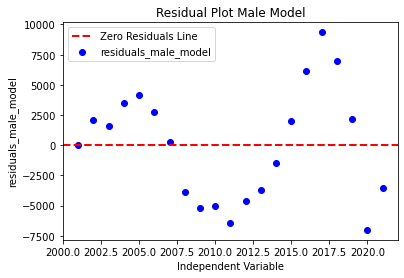

<Figure size 432x288 with 0 Axes>

In [11]:
residuals_male_model = x_data - fitfunc(t_data, *param)
#print(residuals)
ss_res = np.sum(residuals_male_model**2)
ss_tot = np.sum((x_data - np.mean(x_data))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')

# Plot the residuals
plt.scatter(t_data, residuals_male_model, label='residuals_male_model', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals Line')

plt.title('Residual Plot Male Model')
plt.xlabel('Independent Variable')
plt.ylabel('residuals_male_model')
plt.legend()
plt.show()
plt.savefig('Residual Plot Male Model.png', dpi=250)

# Heterosexual female model fitting

constant: [ 1.07902105e+02  3.14118914e-01  5.38091104e-01 -3.40511172e-02
  2.13527917e+01  2.58132935e+03]


/Users/nuzhatnishi/opt/anaconda3/lib/python3.8/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


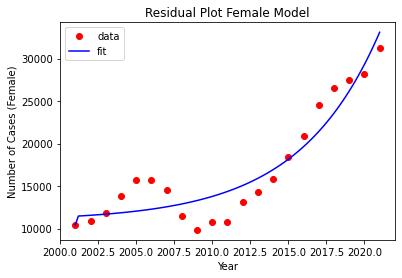

In [12]:
x_data = reshaped_df['Cases_Male'].to_numpy()
y_data = reshaped_df['Cases_Female'].to_numpy()
t_data = reshaped_df['Year'].to_numpy()
#print(t_data)

def fitfunc(t, a, b, c, d, f, g):
    'Function that returns Ca computed from an ODE for a k'
    #x, y = variables
    def myode(Y, t):
        x, y = Y
        return (-a * x + b * (f - x) * y, -c * y + d * (g - y) * x)
    
    #Set up the initial conditions and parameter values
   # t = np.linspace(min(x_data), max(x_data), 100)
    initial_x =  reshaped_df['Cases_Male'][0]
    initial_y =  reshaped_df['Cases_Female'][0]
    initial_conditions = [initial_x, initial_y]
    solution = odeint(myode, initial_conditions, t)
    #print(solution[:,1])
    return solution[:,1]



initial_guess = [1, 1, 1, 0, 1, 1]

#a_fit, b_fit, c_fit, d_fit, f_fit, g_fit, acov, bcov, ccov, dcov, fcov, gcov = curve_fit(fitfunc, t_data, (x_data, y_data), p0=None)
#print (a_fit, b_fit, c_fit, d_fit, f_fit, g_fit)

param, cov = curve_fit(fitfunc, t_data, y_data, p0=initial_guess)
print ("constant:", param)


#tfit = np.linspace(0,1);
tfit = np.linspace(min(t_data), max(t_data), 100);
fit = fitfunc(tfit, param[0], param[1], param[2], param[3], param[4], param[5])
#print(fit)

import matplotlib.pyplot as plt
plt.title('Residual Plot Female Model')
plt.xlabel('Year')
plt.ylabel('Number of Cases (Female)')
plt.plot(t_data, y_data, 'ro', label='data')
plt.plot(tfit, fit, 'b-', label='fit')
plt.legend(loc='best')
plt.savefig('Fitting Numerical ODE Solution to Data_Female.png', dpi=300)

# Model Assesment Heterosexual Female Model

R-squared: 0.8869834495882323


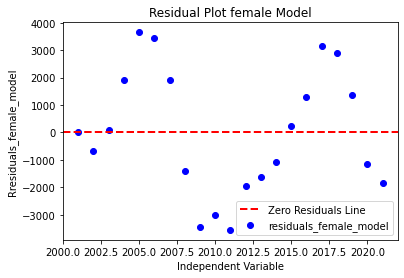

In [13]:
residuals_female_model = y_data - fitfunc(t_data, *param)
#print(residuals)
ss_res = np.sum(residuals_female_model**2)
ss_tot = np.sum((y_data - np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f'R-squared: {r_squared}')
# Plot the residuals
plt.scatter(t_data, residuals_female_model, label='residuals_female_model', color='blue')
plt.axhline(0, color='red', linestyle='--', linewidth=2, label='Zero Residuals Line')

plt.title('Residual Plot female Model')
plt.xlabel('Independent Variable')
plt.ylabel('Rresiduals_female_model')
plt.legend()
plt.show()

# Equilibrium and Stability Heterosexual Model

In [14]:
from sympy import symbols, Eq, solve

# Define variables
x, y = symbols('x y')

# Given parameters
a = 6.00125055e-01
b = 7.26781818e-01
c = 5.38091104e-01
d = 3.40511172e-02
f = 4.41372302e+01
g = 2.58132935e+03

# Equations
eq1 = Eq(-a*x + b*(f - x)*y, 0)
eq2 = Eq(-c*y + d*(g - y)*x, 0)

# Solve for equilibrium points
equilibrium_points = solve((eq1, eq2), (x, y))
print("Equilibrium Points:", equilibrium_points)

Equilibrium Points: [(0.0, 0.0), (44.1180625085197, 1900.57199686022)]


In [15]:
from sympy import symbols, Eq, solve, Matrix

# Define variables
x, y = symbols('x y')

# Given parameters
a = 6.00125055e-01
b = 7.26781818e-01
c = 5.38091104e-01
d = 3.40511172e-02
f = 4.41372302e+01
g = 2.58132935e+03

# Equations
eq1 = -a*x + b*(f - x)*y
eq2 = -c*y + d*(g - y)*x

# Jacobian matrix
J = Matrix([[eq1.diff(x), eq1.diff(y)], [eq2.diff(x), eq2.diff(y)]])

# Find equilibrium points
equilibrium_points = solve((eq1, eq2), (x, y))

# Check stability for each equilibrium point
for point in equilibrium_points:
    J_at_point = J.subs({x: point[0], y: point[1]})
    eigenvalues = J_at_point.eigenvals()
    
    # Determine stability based on eigenvalues
    if all(val.as_real_imag()[0] < 0 for val in eigenvalues):
        print(f"Equilibrium point {point} is stable.")
    else:
        print(f"Equilibrium point {point} is unstable.")

Equilibrium point (0.0, 0.0) is unstable.
Equilibrium point (44.1180625085197, 1900.57199686022) is stable.


In [16]:
# Calculate critical number
critical_number = (a / (b * f)) * (c / (d * g))

print("Basic Reproduction Number (R0):", critical_number)

# Check conditions for an epidemic
if critical_number > 1:
    print("There is a potential for an epidemic.")
else:
    print("The infection is likely to die out.")

Basic Reproduction Number (R0): 0.00011452852201864843
The infection is likely to die out.


[(-652.653332240645, -0.825729318121164), (0.0, 0.0)]
[(-202.505139988929, -0.137896736831400), (0.0, 0.0)]
[(0.0, 0.0), (247.643052262789, 0.115362102125229)]
[(0.0, 0.0), (697.791244514506, 0.247024127395393)]
[(0.0, 0.0), (1147.93943676622, 0.327709195532839)]
[(0.0, 0.0), (1598.08762901793, 0.382221396518860)]
[(0.0, 0.0), (2048.23582126965, 0.421518520765433)]
[(0.0, 0.0), (2498.38401352137, 0.451190544081896)]
[(0.0, 0.0), (2948.53220577308, 0.474387883078225)]
[(0.0, 0.0), (3398.68039802480, 0.493021310103190)]
[(0.0, 0.0), (3848.82859027651, 0.508317073322040)]
[(0.0, 0.0), (4298.97678252823, 0.521098233832716)]
[(0.0, 0.0), (4749.12497477995, 0.531937787658288)]
[(0.0, 0.0), (5199.27316703166, 0.541246930962434)]
[(0.0, 0.0), (5649.42135928339, 0.549328404587941)]
[(0.0, 0.0), (6099.56955153508, 0.556410039255294)]
[(0.0, 0.0), (6549.71774378682, 0.562666575463510)]
[(0.0, 0.0), (6999.86593603851, 0.568234276375457)]
[(0.0, 0.0), (7450.01412829026, 0.573220965968332)]
[(0.0, 0

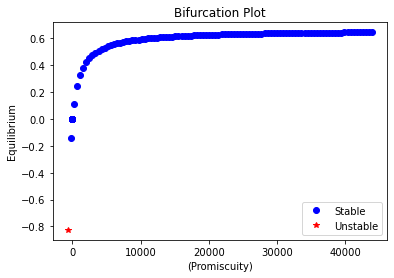

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, Matrix

# Define variables
x, y = symbols('x y')

# Given parameters
a = 6.00125055e-01
b = 7.26781818e-01
c = 5.46689064e+03
d = 4.64348937e+00
f = 4.41372302e+01
#g= 500
g = 6.63806928e-01

# Equations
eq1 = -a*x + b*(f - x)*y
eq2 = -c*y + d*(g - y)*x

# Jacobian matrix
J = Matrix([[eq1.diff(x), eq1.diff(y)], [eq2.diff(x), eq2.diff(y)]])

# Function to check stability of equilibrium points
def is_stable(point):
    J_at_point = J.subs({x: point[0], y: point[1]})
    eigenvalues = J_at_point.eigenvals()
    return all(val.as_real_imag()[0] < 0 for val in eigenvalues)

# Lists to store stable and unstable equilibrium points
stable_points = []
unstable_points = []

# Vary parameter f and check stability
#f_values = np.linspace(0, 10000, 100)
f_values = np.linspace(0, 100000, 100)
#f_values = np.linspace(0, 4.41372302e+01, 100)
for f_val in f_values:
    eq1 = -a*x + b*(f_val - x)*y
    eq2 = -c*y + d*(g - y)*x
    equilibrium_points = solve((eq1, eq2), (x, y))
    print(equilibrium_points)

    for point in equilibrium_points:
        if is_stable(point):
            stable_points.append(point)
        else:
            unstable_points.append(point)

# Convert lists to numpy arrays for easy plotting
stable_points = np.array(stable_points)
unstable_points = np.array(unstable_points)

# Plot stable points as dots and unstable points as stars
plt.plot(stable_points[:, 0], stable_points[:, 1], 'bo', label='Stable')
plt.plot(unstable_points[:, 0], unstable_points[:, 1], 'r*', label='Unstable')

plt.xlabel('(Promiscuity)')
plt.ylabel('Equilibrium')
plt.title('Bifurcation Plot')
plt.legend()
plt.show()

In [29]:
from sympy import symbols, Eq, solve, Matrix

# Define variables
x, y = symbols('x y')

# Given parameters
a = 6.00125055e-01
b = 7.26781818e-01
c = 5.38091104e-01
d = 3.40511172e-02
f = 100000
g = 2.58132935e+03

# Equations
eq1 = -a*x + b*(f - x)*y
eq2 = -c*y + d*(g - y)*x

# Jacobian matrix
J = Matrix([[eq1.diff(x), eq1.diff(y)], [eq2.diff(x), eq2.diff(y)]])

# Find equilibrium points
equilibrium_points = solve((eq1, eq2), (x, y))

# Check stability for each equilibrium point
for point in equilibrium_points:
    J_at_point = J.subs({x: point[0], y: point[1]})
    eigenvalues = J_at_point.eigenvals()
    
    # Determine stability based on eigenvalues
    if all(val.as_real_imag()[0] < 0 for val in eigenvalues):
        print(f"Equilibrium point {point} is stable.")
    else:
        print(f"Equilibrium point {point} is unstable.")

Equilibrium point (0.0, 0.0) is unstable.
Equilibrium point (99968.0166458550, 2580.92137068492) is stable.


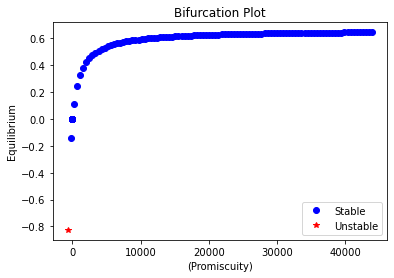

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, Matrix

# Define variables
x, y = symbols('x y')

# Given parameters
a = 6.00125055e-01
b = 7.26781818e-01
c = 5.46689064e+03
d = 4.64348937e+00
f = 4.41372302e+01
#g= 500
g = 6.63806928e-01

# Equations
eq1 = -a*x + b*(f - x)*y
eq2 = -c*y + d*(g - y)*x

# Jacobian matrix
J = Matrix([[eq1.diff(x), eq1.diff(y)], [eq2.diff(x), eq2.diff(y)]])

# Function to check stability of equilibrium points
def is_stable(point):
    J_at_point = J.subs({x: point[0], y: point[1]})
    eigenvalues = J_at_point.eigenvals()
    return all(val.as_real_imag()[0] < 0 for val in eigenvalues)

# Lists to store stable and unstable equilibrium points
stable_points = []
unstable_points = []

# Vary parameter f and check stability
#f_values = np.linspace(0, 10000, 100)
f_values = np.linspace(0, 100000, 100)
g_values = np.linspace(0, 500, 100)
#f_values = np.linspace(0, 4.41372302e+01, 100)
for f_val in f_values:
    for g_val in g_values:
        eq1 = -a*x + b*(f_val - x)*y
        eq2 = -c*y + d*(g - y)*x
        equilibrium_points = solve((eq1, eq2), (x, y))
        #print(equilibrium_points)

    for point in equilibrium_points:
        if is_stable(point):
            stable_points.append(point)
        else:
            unstable_points.append(point)

# Convert lists to numpy arrays for easy plotting
stable_points = np.array(stable_points)
unstable_points = np.array(unstable_points)

# Plot stable points as dots and unstable points as stars
plt.plot(stable_points[:, 0], stable_points[:, 1], 'bo', label='Stable')
plt.plot(unstable_points[:, 0], unstable_points[:, 1], 'r*', label='Unstable')

plt.xlabel('(Promiscuity)')
plt.ylabel('Equilibrium')
plt.title('Bifurcation Plot')
plt.legend()
plt.show()